In [16]:
import pandas as pd
df=pd.read_csv("/content/data.csv")
df

,Loves Popcorn,Loves Soda,Age,Loves Cool As Ice
0,Yes,Yes,7,No
1,Yes,No,12,No
2,No,Yes,18,Yes
3,No,Yes,35,Yes
4,Yes,Yes,38,Yes
5,Yes,No,50,No
6,No,No,83,No


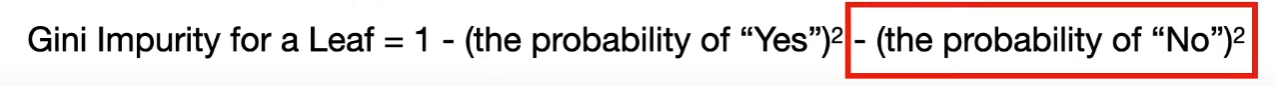

In [51]:
#calculate the no of true-false and yes-no in love_popcorn and love_soda
def return_true_false(feature,label):
  feature_value={}
  feature_value['f_true']={}
  feature_value['f_false']={}
  feature_value['f_true']['l_yes']=0
  feature_value['f_true']['l_no']=0
  feature_value['f_false']['l_yes']=0
  feature_value['f_false']['l_no']=0
  for f,l in zip(feature,label):
    if f=='Yes' and l=='Yes':
      feature_value['f_true']['l_yes']=feature_value['f_true']['l_yes']+1
    elif f=='Yes' and l=='No':
      feature_value['f_true']['l_no']=feature_value['f_true']['l_no']+1
    elif f=='No' and l=='Yes':
      feature_value['f_false']['l_yes']=feature_value['f_false']['l_yes']+1
    elif f=='No' and l=='No':
      feature_value['f_false']['l_no']=feature_value['f_false']['l_no']+1
  return feature_value
#calculate the no of true-false and yes-no in age
def return_true_false2(feature,label,age):
  feature_value={}
  feature_value['f_true']={}
  feature_value['f_false']={}
  feature_value['f_true']['l_yes']=0
  feature_value['f_true']['l_no']=0
  feature_value['f_false']['l_yes']=0
  feature_value['f_false']['l_no']=0
  for f,l in zip(feature,label):
    if f<age and l=='Yes':
      feature_value['f_true']['l_yes']=feature_value['f_true']['l_yes']+1
    elif f<age and l=='No':
      feature_value['f_true']['l_no']=feature_value['f_true']['l_no']+1
    elif f>=age and l=='Yes':
      feature_value['f_false']['l_yes']=feature_value['f_false']['l_yes']+1
    elif f>=age and l=='No':
      feature_value['f_false']['l_no']=feature_value['f_false']['l_no']+1
  return feature_value
def gini_impurity1(value):
  total=0
  total=value['f_true']['l_yes']+value['f_true']['l_no']+value["f_false"]['l_yes']+value["f_false"]['l_no']
  total_gini_impurity=0
  for x in value:
    try:
      #calculation of gini impurity
      prob1=(value[x]['l_yes']/(value[x]['l_yes']+value[x]['l_no']))**2
      prob2=(value[x]['l_no']/(value[x]['l_yes']+value[x]['l_no']))**2
      prob=1-prob1-prob2
      #calculation of total gini impurity
      total_gini_impurity+=((value[x]['l_yes']+value[x]['l_no'])/total)*prob
    except:
      total_gini_impurity+=0
    
  return total_gini_impurity


{'f_true': {'l_yes': 0, 'l_no': 1}, 'f_false': {'l_yes': 3, 'l_no': 3}}
{'f_true': {'l_yes': 0, 'l_no': 2}, 'f_false': {'l_yes': 3, 'l_no': 2}}
{'f_true': {'l_yes': 1, 'l_no': 2}, 'f_false': {'l_yes': 2, 'l_no': 2}}
{'f_true': {'l_yes': 2, 'l_no': 2}, 'f_false': {'l_yes': 1, 'l_no': 2}}
{'f_true': {'l_yes': 3, 'l_no': 2}, 'f_false': {'l_yes': 0, 'l_no': 2}}
{'f_true': {'l_yes': 3, 'l_no': 3}, 'f_false': {'l_yes': 0, 'l_no': 1}}


In [57]:
love_popcorn=return_true_false(df['Loves Popcorn'],df['Loves Cool As Ice'])
love_soda=return_true_false(df['Loves Soda'],df['Loves Cool As Ice'])
love_popcorn_value=gini_impurity1(love_popcorn)
love_soda_value=gini_impurity1(love_soda)

In [53]:
arr=[]
for i,x in enumerate(df['Age']):
  if i==0:
    continue
  else:
    arr.append((df['Age'][i]+df['Age'][i-1])/2)
all_age_gini=[]
for x in arr:
  #calculation of gini impurity on each middle age
  temp=return_true_false2(df['Age'],df['Loves Cool As Ice'],x)
  all_age_gini.append(gini_impurity1(temp))


In [56]:
mini=min(all_age_gini)
for i,x in enumerate(all_age_gini):
  if mini==x:
    age_value=arr[i]
    break


15.0


In [60]:
decision_tree={'love_soda':love_soda_value,'love_popcorn_value':love_popcorn_value,'age':mini}
sorted_decision_tree = sorted(decision_tree.items(), key=lambda x: x[1], reverse=False)
sorted_decision_tree

[('love_soda', 0.21428571428571427),
 ('age', 0.34285714285714286),
 ('love_popcorn_value', 0.40476190476190477)]